# Rerunning cluster analysis on final annotations

In [32]:
import custom_functions_scviEnv as cf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scanpy as sc
import seaborn as sns
import warnings

### Need to set figdirs to emtpy strings otherwise scanpy tries to save matrix and dot plots to a nonexistent folder
sc.settings.figdir = ''
sc.plotting._matrixplot.MatrixPlot.DEFAULT_SAVE_PREFIX = ''
sc.plotting._dotplot.DotPlot.DEFAULT_SAVE_PREFIX = ''
sc.set_figure_params(scanpy=True, dpi=80, dpi_save=150, frameon=True, vector_friendly=True, 
                     fontsize=14, figsize=None, color_map=None, format='png', facecolor=None, 
                     transparent=False, ipython_format='png2x')

In [2]:
warnings.filterwarnings("ignore")

## Loading Data

In [14]:
adata = sc.read_h5ad('../data/taPVAT_combined_annotated_with_immune_fibro_ecs.h5ad')
adata

AnnData object with n_obs × n_vars = 71813 × 2000
    obs: 'sample_id', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier', 'n_genes', 'scDblFinder_score', 'scDblFinder_class', 'Sample', 'tissue', 'diet', 'time', 'sex', 'batch', 'sample_type', 'rat_id', 'weight_3W', 'weight_10W', 'weight_17W', 'weight_24W', 'MAP_7W', 'systolic_bp_7W', 'MAP_9W', 'systolic_bp_9W', 'MAP_16W', 'systolic_bp_16W', 'MAP_24W', 'systolic_bp_24W', 'doublet', 'celltype', 'celltype_broad', 'leiden'
    var: 'gene_ids', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances

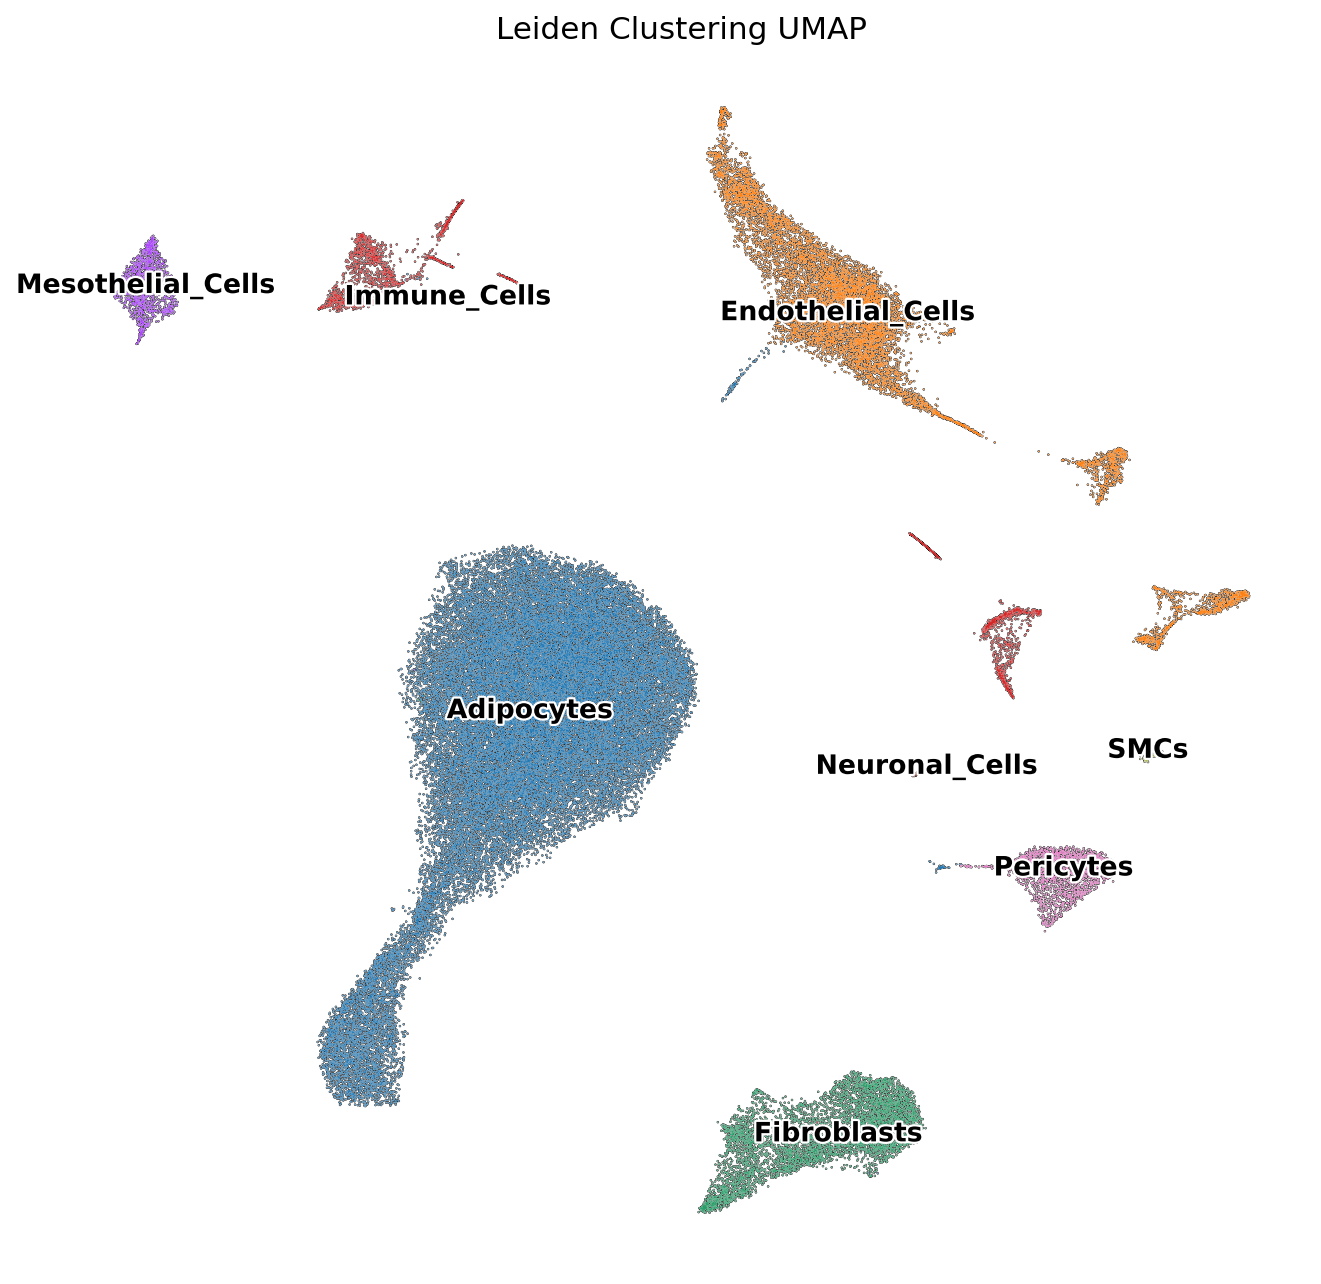

In [4]:
###Plotting single graph of all high-level cell types
fig, ax = plt.subplots(ncols = 1, figsize = (10,10))
sc.pl.umap(adata, ax = ax, color='celltype_broad', add_outline=True, legend_loc='on data',
           legend_fontsize=12, legend_fontoutline=2,frameon=False,
           title = 'Leiden Clustering UMAP')

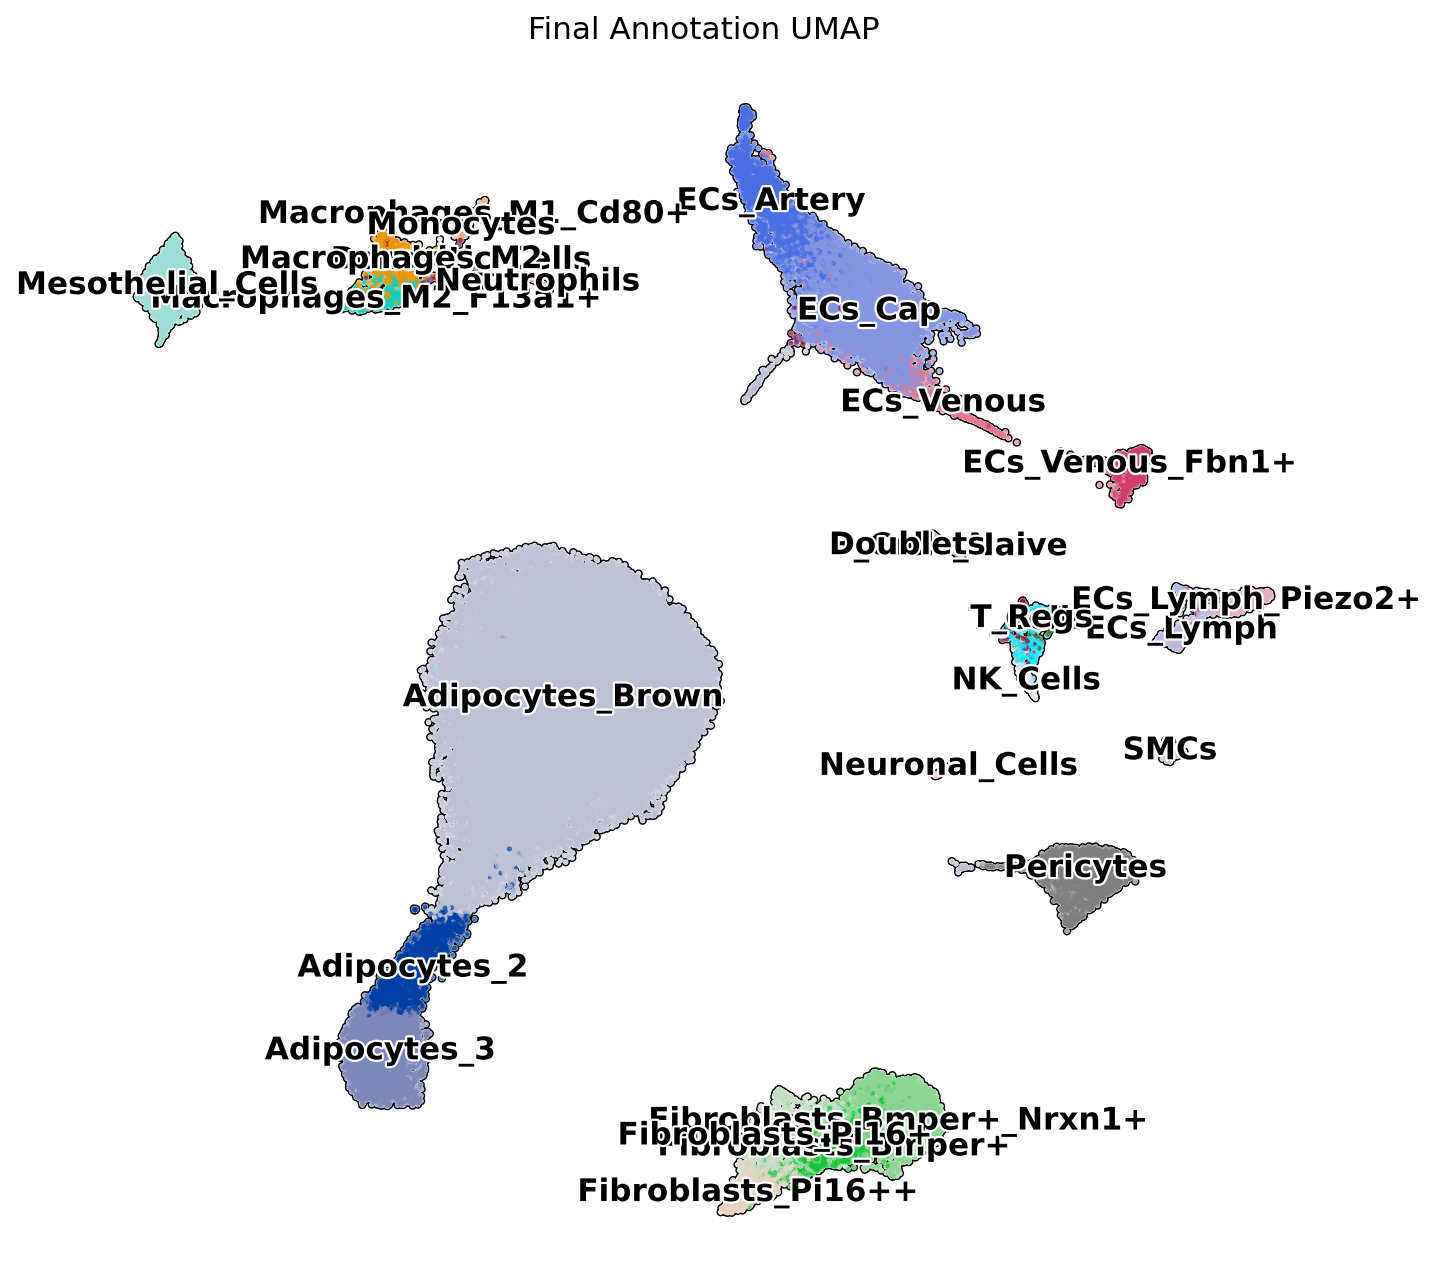

In [5]:
###Plotting single graph of all low-level cell types
fig, ax = plt.subplots(figsize = (10,10))
sc.pl.umap(adata, ax = ax, color='celltype', add_outline=True, size = 20, 
        legend_loc='on data', legend_fontsize=14, legend_fontoutline=2,frameon=False,
        title='Final Annotation UMAP')
plt.show()

## Double check that celltype labels are reasonable

In [15]:
## May need to run this to get rank_genes_groups to work
adata.uns['log1p']["base"] = None

In [16]:
### First for celltype_broad
sc.tl.rank_genes_groups(adata, groupby = 'celltype_broad', method='wilcoxon', use_raw = True, tie_correct = True, pts = True)

In [8]:
sc.tl.dendrogram(adata, groupby = 'celltype_broad')

         Falling back to preprocessing with `sc.pp.pca` and default params.


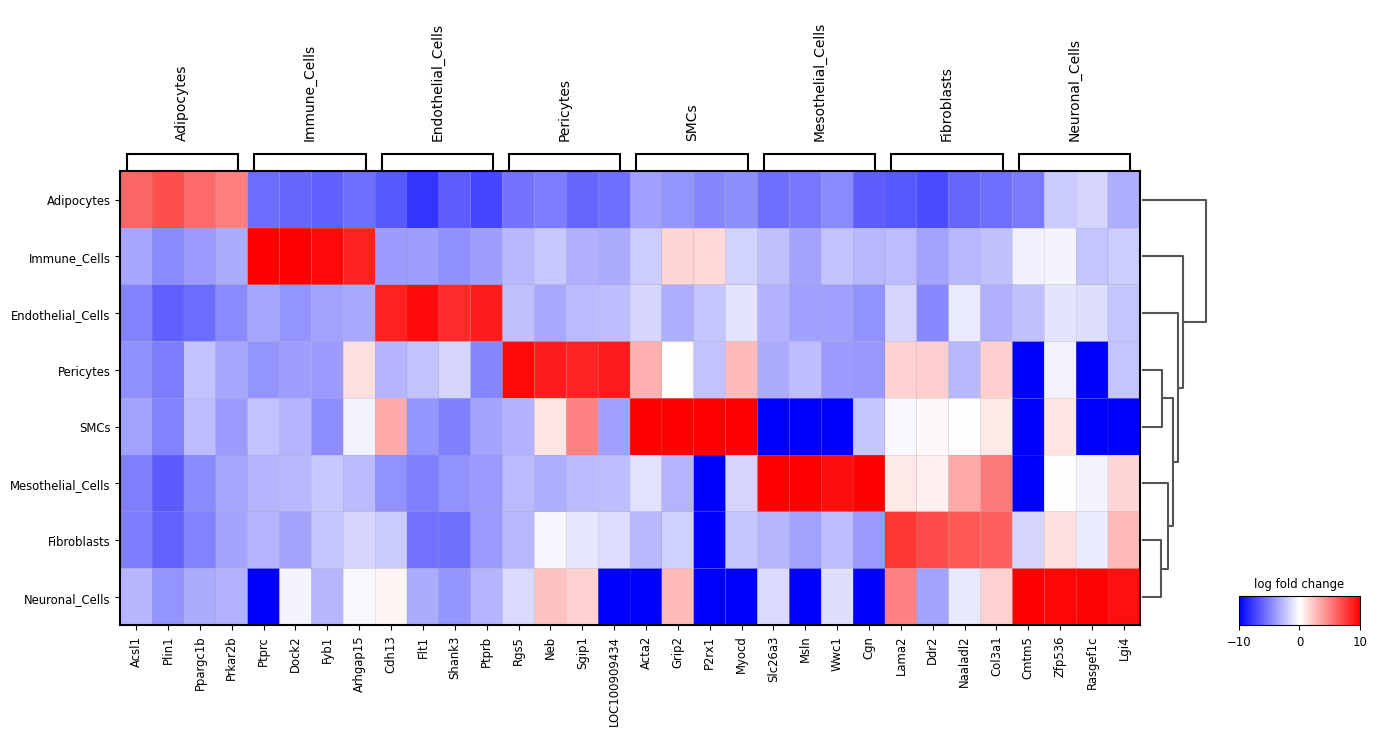

In [24]:
fig, ax = plt.subplots(figsize = (16,8))

sc.pl.rank_genes_groups_matrixplot(
    adata,
    ax = ax,
    n_genes=4,
    values_to_plot="logfoldchanges",
    cmap='bwr',
    vmin=-10,
    vmax=10,
    min_logfoldchange=3,
    colorbar_title='log fold change',
    save = '../output/taPVAT_matrixplot_rank_genes_groups_celltype_broad.png'
)

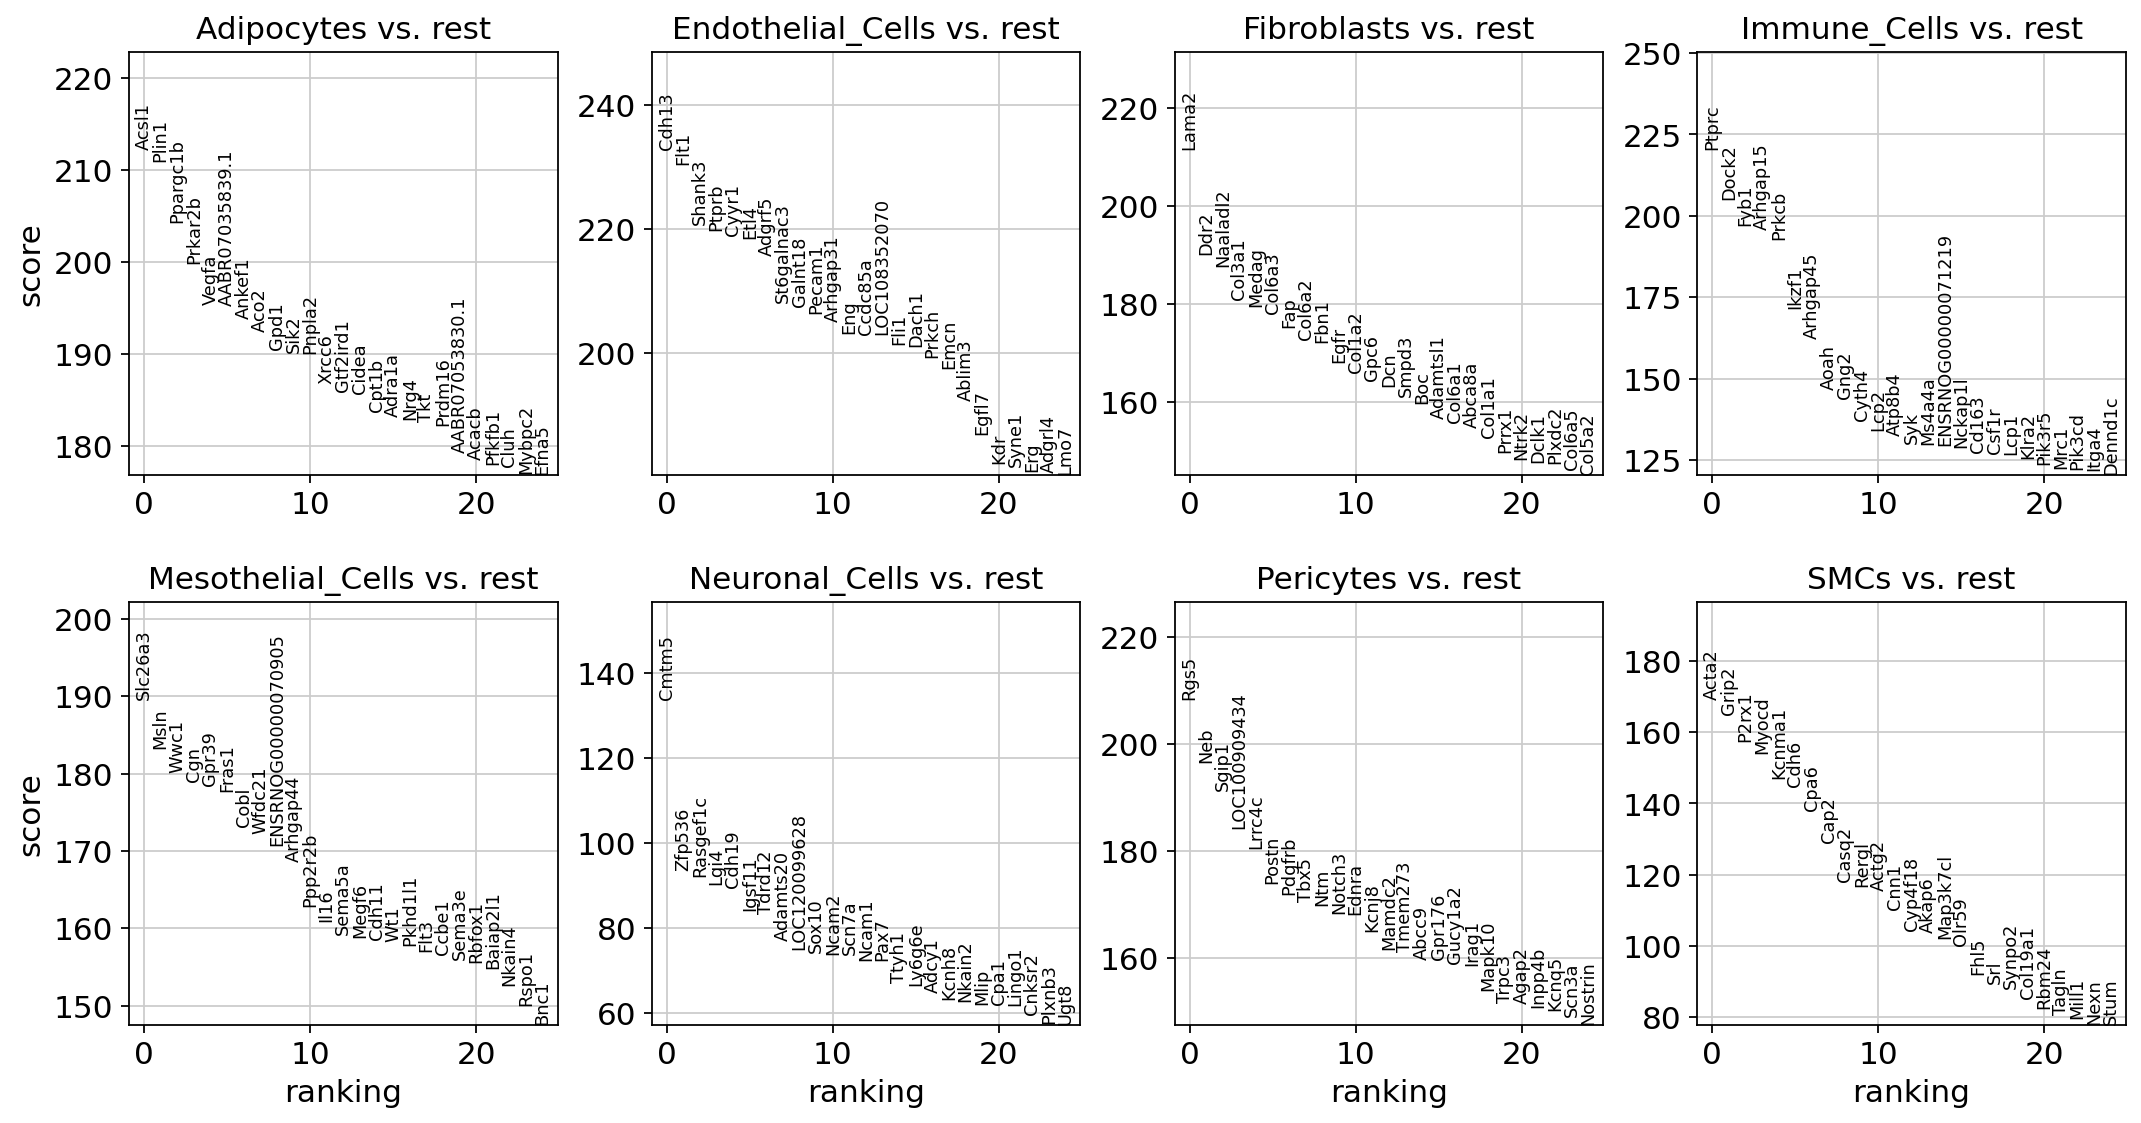

In [15]:
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)
pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(25)
pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(25).to_csv('../output/taPVAT_8W_24W_M_F_HF_CTRL_rank_genes_groups_celltype_broad.csv')

In [ ]:
### Do the same for low-level cell types
sc.tl.rank_genes_groups(adata, groupby = 'celltype', method='wilcoxon', use_raw = True, tie_correct = True, pts = True)

In [ ]:
sc.tl.dendrogram(adata, groupby = 'celltype')

In [ ]:
fig, ax = plt.subplots(figsize = (16,8))

sc.pl.rank_genes_groups_matrixplot(
    adata,
    ax = ax,
    n_genes=4,
    values_to_plot="logfoldchanges",
    cmap='bwr',
    vmin=-10,
    vmax=10,
    min_logfoldchange=3,
    colorbar_title='log fold change'
    save = '../output/taPVAT_matrixplot_rank_genes_groups_celltype_final.png'
)

In [ ]:
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)
pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(25)
pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(25).to_csv('../output/taPVAT_8W_24W_M_F_HF_CTRL_rank_genes_groups_celltype_final.csv')

## Visualizing the location of expression of common marker genes

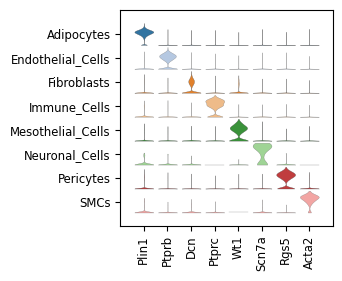

In [26]:
### Violin plot of gene expression for labeling "high-level" cell-types
mgl = ["Plin1",  #Adipocytes
       "Ptprb",  #Endothelial_Cells
       "Dcn",    #Fibroblasts
       "Ptprc",  #Immune_Cells
       "Wt1",    #Mesothelial_Cells
       "Scn7a",  #Neuronal_Cells
       "Rgs5",   #Pericytes
       "Acta2"   #SMCs
]

ax = sc.pl.stacked_violin(adata, 
                          mgl, 
                          use_raw = True,
                          groupby='celltype_broad', 
                          swap_axes = False, 
                          row_palette = 'tab20')

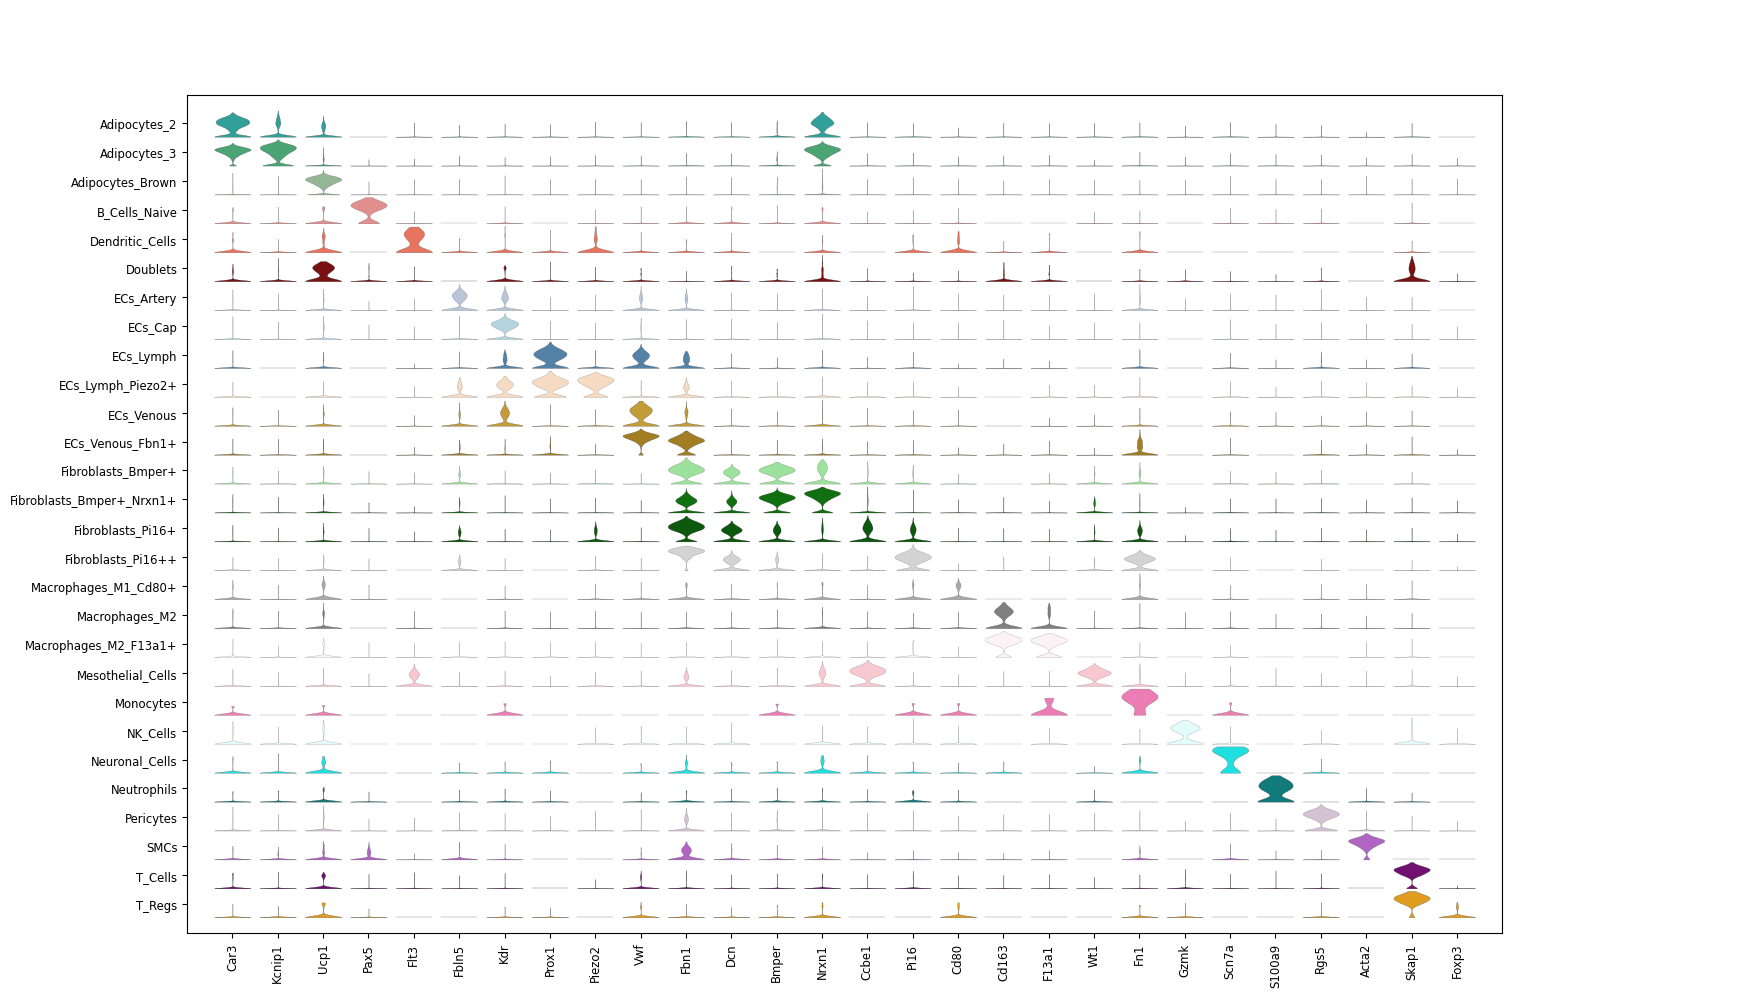

In [28]:
### Violin plot of gene expression for labeling "low-level" cell-types
fig, ax = plt.subplots(figsize=(20,12))  # Adjust figsize as needed

mgl = ["Car3",
       "Kcnip1",
       "Ucp1",
       "Pax5",
       "Flt3",
       "Fbln5",
       "Kdr",
       "Prox1",
       "Piezo2",
       "Vwf",
       "Fbn1",
       "Dcn",
       "Bmper",
       "Nrxn1",
       "Ccbe1",
       "Pi16",
       "Cd80",
       "Cd163",
       "F13a1",
       "Wt1",
       "Fn1",
       "Gzmk",
       "Scn7a",
       "S100a9",
       "Rgs5",
       "Acta2",
       "Skap1",
       "Foxp3"
]

ax = sc.pl.stacked_violin(adata, 
                          mgl, 
                          use_raw = True,
                          groupby='celltype',
                          ax = ax,
                          swap_axes = False, 
                          row_palette = cf.large_palette)

## Comparing our labels to labels used in other literature

In [29]:
### From Rance: https://github.com/naultran/BAT_taPVAT_snRNAseq/blob/main/PVAT_BAT_Combined/code/1_PVAT_BAT_scanpy-scvi_integration-Final.ipynb

def filter_genes_in_dict(adata, cell_type_genes_dict):
    """
    Filter genes in the cell_type_genes_dict that are not present in the adata object for each cell type.

    Parameters:
    adata (anndata.AnnData): The AnnData object containing gene expression data.
    cell_type_genes_dict (dict): A dictionary where keys are cell types and values are lists of genes.

    Returns:
    filtered_dict (dict): A filtered version of cell_type_genes_dict with only genes present in the adata.
    """
    filtered_dict = {}

    for cell_type, genes in cell_type_genes_dict.items():
        # Filter genes that are present in adata
        valid_genes = [gene for gene in genes if gene in adata.var_names]

        # Add the filtered genes to the dictionary
        filtered_dict[cell_type] = valid_genes

    return filtered_dict

In [30]:
# Load the tab-delimited file into a DataFrame
markers_mouse = pd.read_csv('../data/41586_2022_4518_MOESM5_ESM_ALL.txt', sep = '\t', index_col = 0)

# Initialize an empty dictionary
cluster_dict = {}

# Iterate through unique clusters and create a dictionary entry for each
for cluster in markers_mouse['cluster'].unique():
    # Filter the DataFrame for rows with the current cluster
    cluster_df = markers_mouse[markers_mouse['cluster'] == cluster]
    
    # Sort the cluster DataFrame by the "fold-change" column in descending order
    sorted_cluster_df = cluster_df.sort_values(by='avg_log2FC', ascending=False)
    
    # Extract the top 100 gene values for the cluster as a list
    top_genes = sorted_cluster_df['gene'].head(50).tolist()
    
    # Add the top 100 gene values list to the dictionary with the cluster as the key
    cluster_dict[cluster] = top_genes

filtered_markers = filter_genes_in_dict(adata, cluster_dict)

/mnt/home/terrianl/anaconda3/envs/scanpyEnv/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:748: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


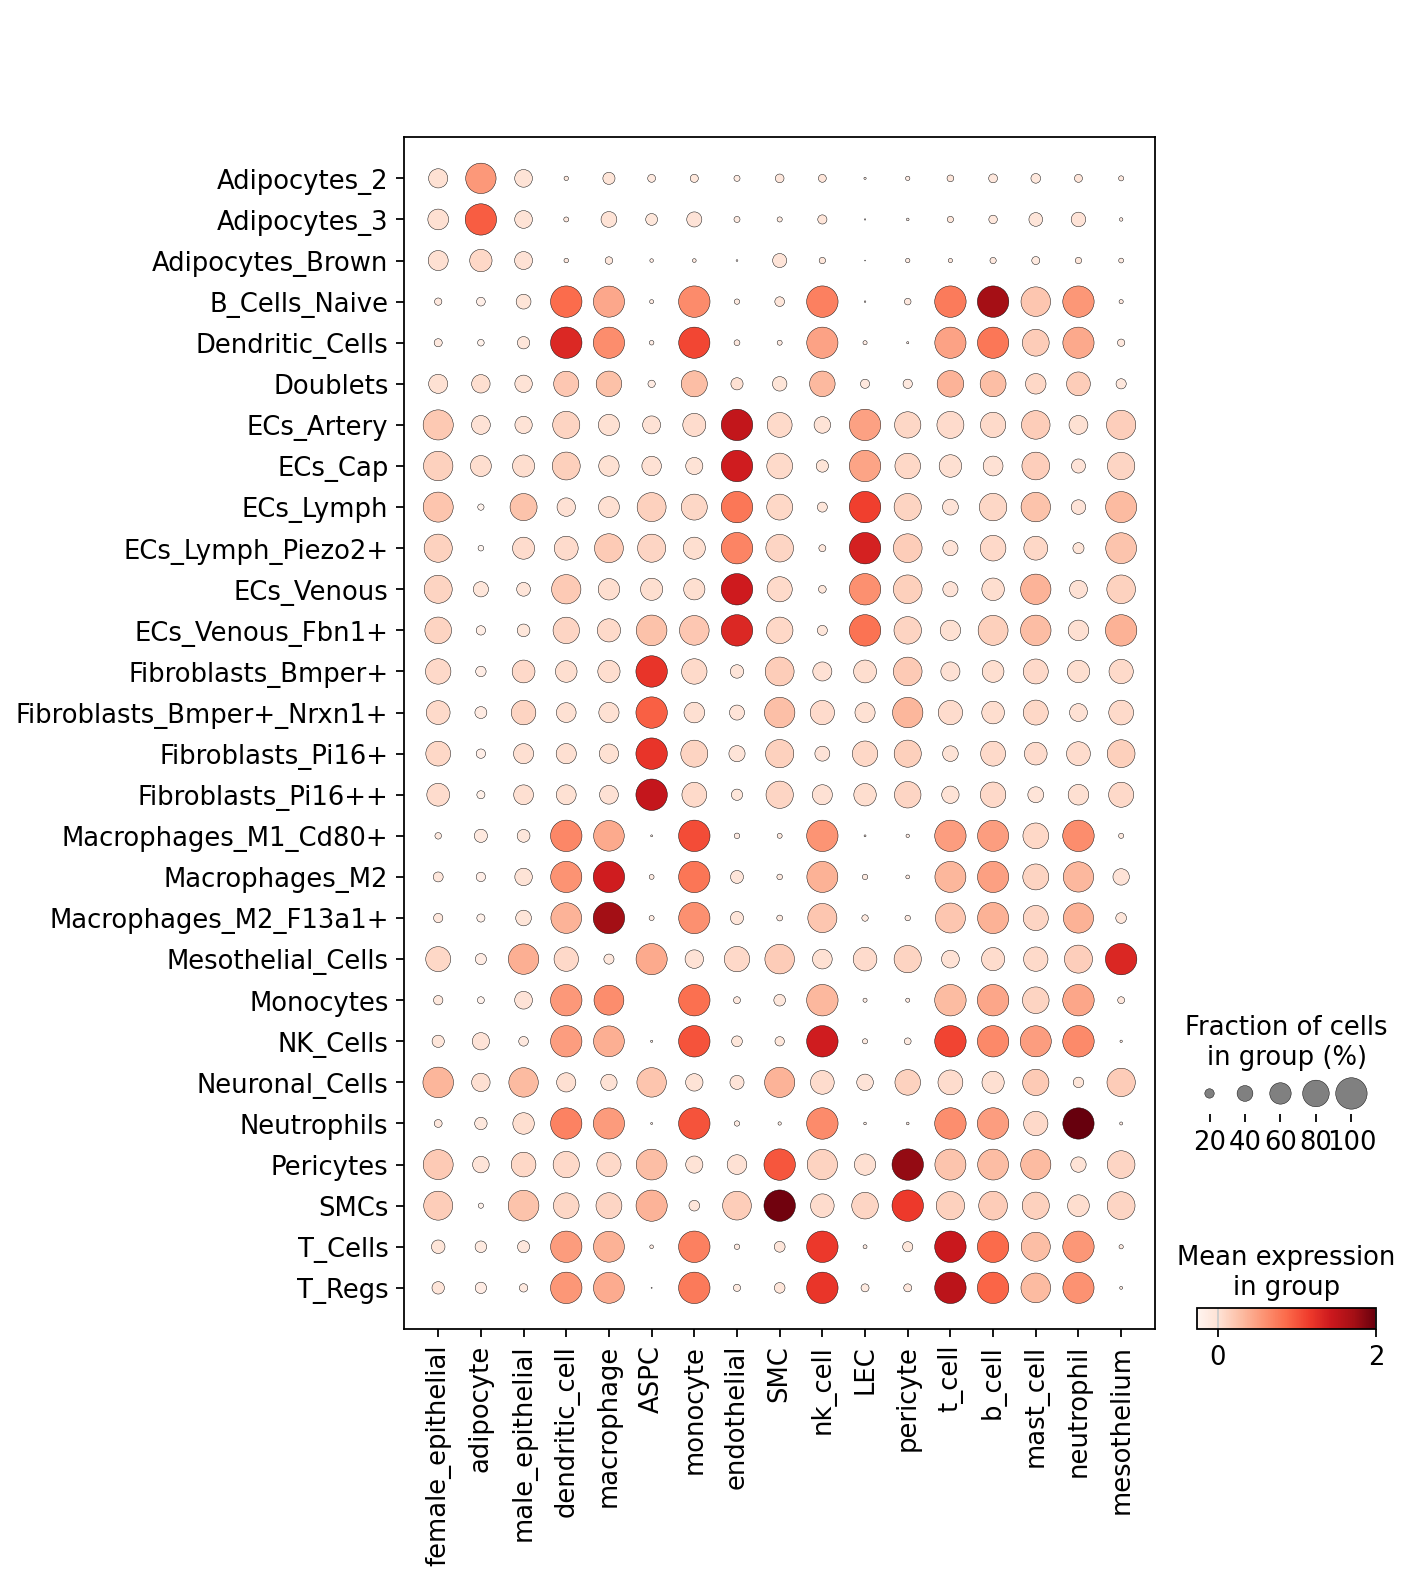

In [33]:
keys = filtered_markers.keys()

for key in keys:
    value = filtered_markers[key]
    sc.tl.score_genes(adata, value, ctrl_size=len(value), gene_pool=None, n_bins=50, score_name=key, use_raw=True)

sc.pl.dotplot(adata, list(keys), groupby='celltype', dendrogram=False, save='../output/taPVAT_dotplot_EmontMouseMarkers50_celltype.png')

In [34]:
# Load the tab-delimited file into a DataFrame
markers_human = pd.read_csv('../data/41586_2022_4518_MOESM4_ESM_ALL.txt', sep = '\t', index_col = 0)

# Initialize an empty dictionary
cluster_dict = {}

# Iterate through unique clusters and create a dictionary entry for each
for cluster in markers_human['cluster'].unique():
    # Filter the DataFrame for rows with the current cluster
    cluster_df = markers_human[markers_human['cluster'] == cluster]
    
    # Sort the cluster DataFrame by the "fold-change" column in descending order
    sorted_cluster_df = cluster_df.sort_values(by='avg_log2FC', ascending=False)
    
    # Extract the top 100 gene values for the cluster as a list
    top_genes = sorted_cluster_df['gene'].head(50).tolist()
    
    # Add the top 100 gene values list to the dictionary with the cluster as the key
    cluster_dict[cluster] = [word.capitalize() for word in top_genes]

filtered_markers = filter_genes_in_dict(adata, cluster_dict)

/mnt/home/terrianl/anaconda3/envs/scanpyEnv/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:748: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


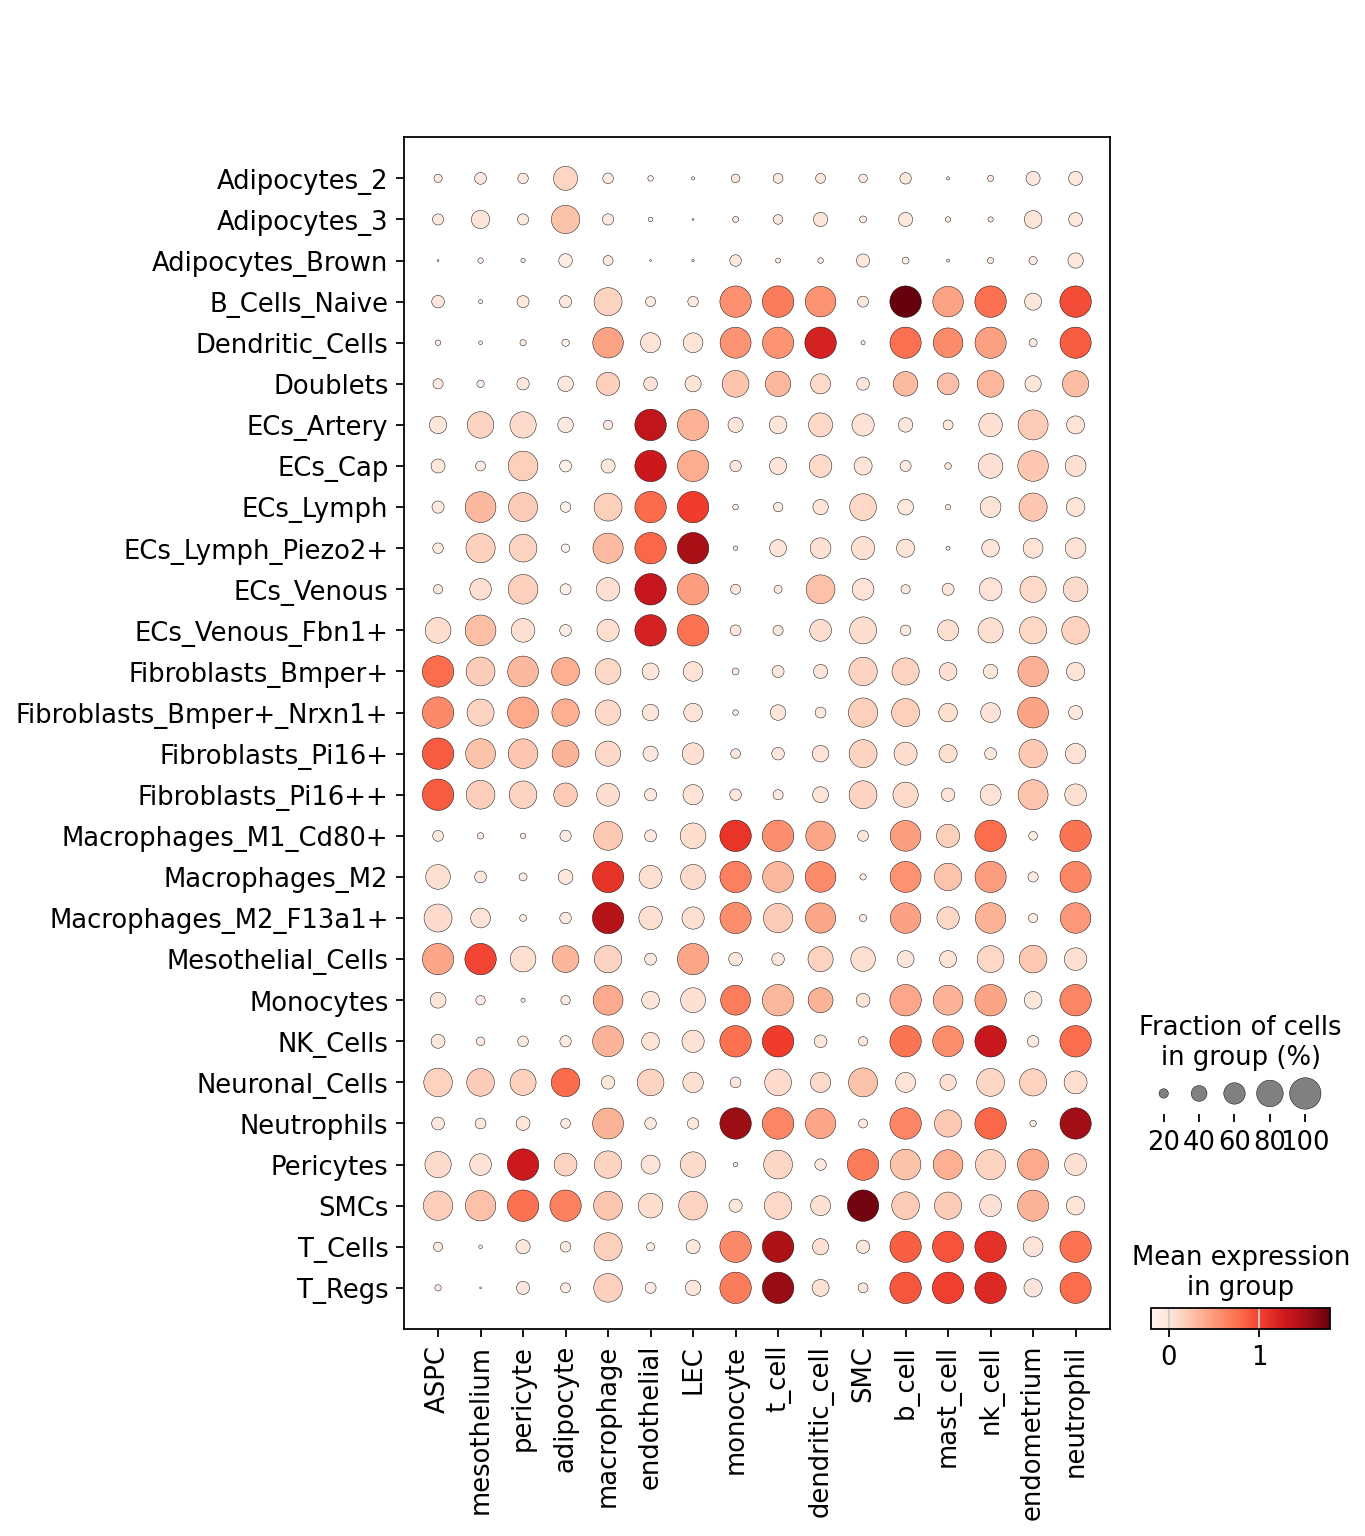

In [35]:
keys = filtered_markers.keys()

for key in keys:
    value = filtered_markers[key]
    sc.tl.score_genes(adata, value, ctrl_size=len(value), gene_pool=None, n_bins=50, score_name=key, use_raw=True)

sc.pl.dotplot(adata, list(keys), groupby='celltype', dendrogram=False, save='../output/taPVAT_dotplot_EmontHumanMarkers50_celltype.png')

In [36]:
# Load the tab-delimited file into a DataFrame
markers_human_BAT = pd.read_csv('../data/Sun_markers_humanBAT.txt', sep = '\t', index_col = 0)

# Initialize an empty dictionary
cluster_dict = {}

# Iterate through unique clusters and create a dictionary entry for each
for cluster in markers_human_BAT['cluster'].unique():
    # Filter the DataFrame for rows with the current cluster
    cluster_df = markers_human_BAT[markers_human_BAT['cluster'] == cluster]
    
    # Sort the cluster DataFrame by the "fold-change" column in descending order
    sorted_cluster_df = cluster_df.sort_values(by='avg_logFC', ascending=False)
    
    # Extract the top 100 gene values for the cluster as a list
    top_genes = sorted_cluster_df['gene'].head(50).tolist()
    
    # Add the top 100 gene values list to the dictionary with the cluster as the key
    cluster_dict[cluster] = [word.capitalize() for word in top_genes]

filtered_markers = filter_genes_in_dict(adata, cluster_dict)

/mnt/home/terrianl/anaconda3/envs/scanpyEnv/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:748: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


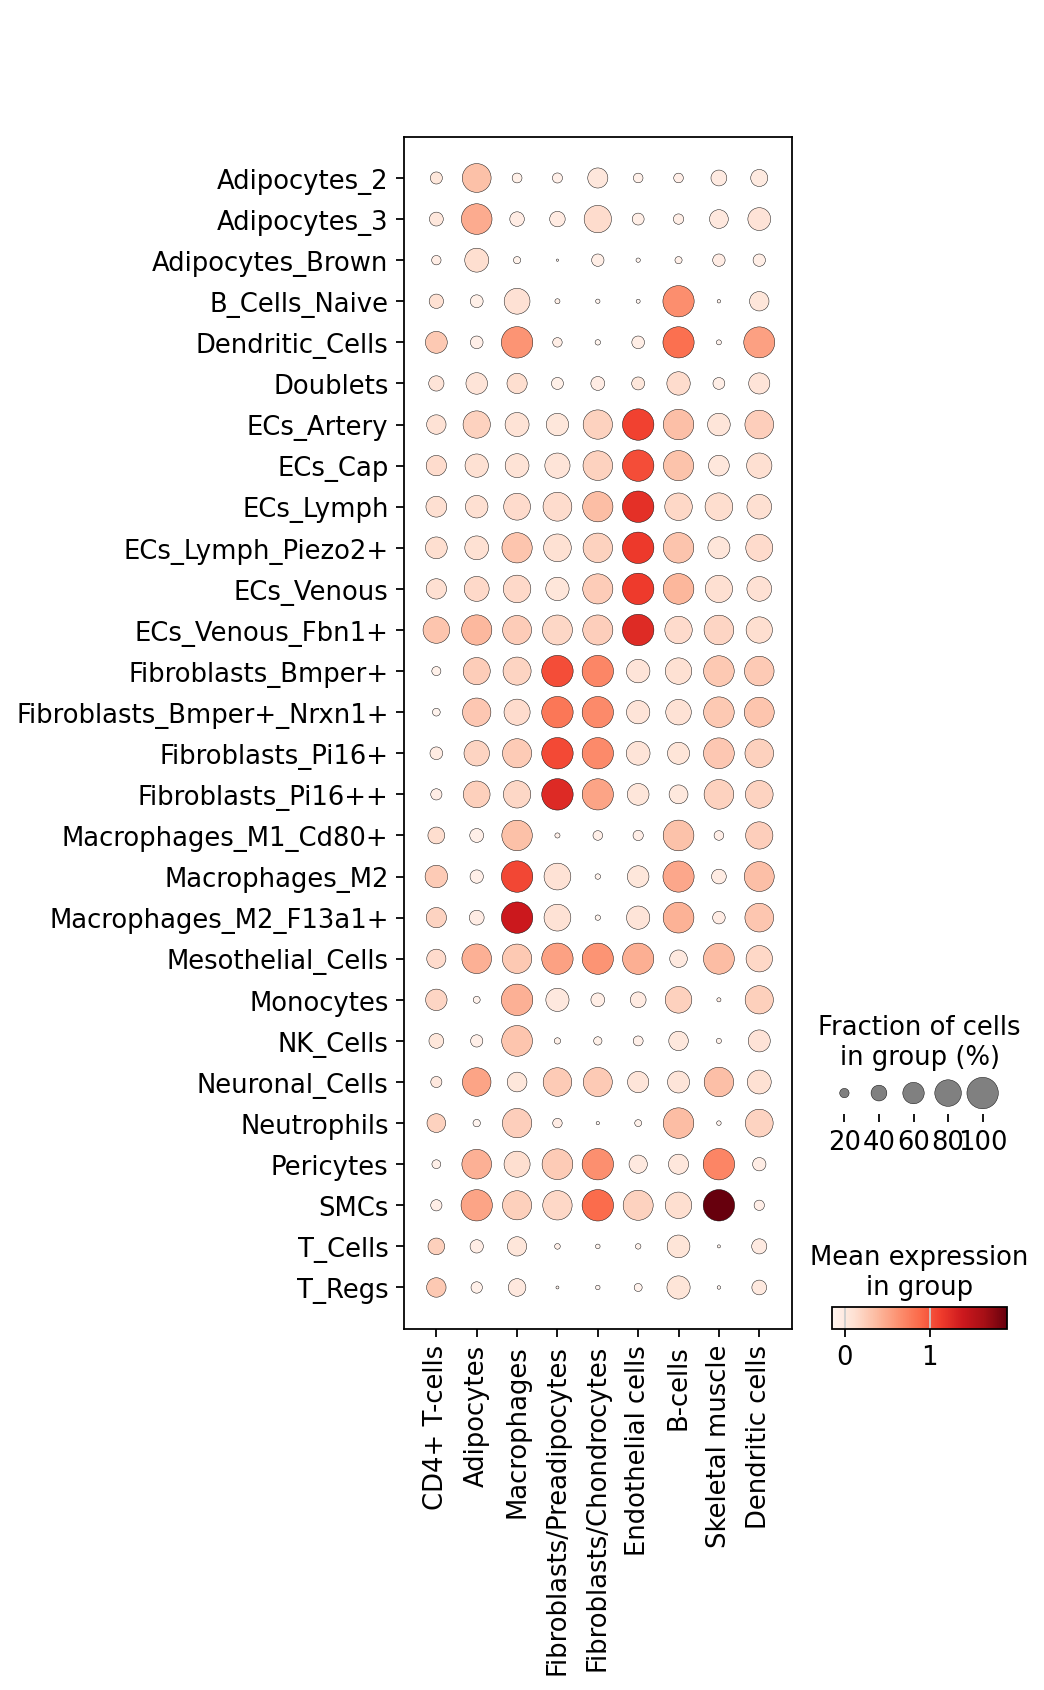

In [37]:
keys = filtered_markers.keys()

for key in keys:
    value = filtered_markers[key]
    sc.tl.score_genes(adata, value, ctrl_size=len(value), gene_pool=None, n_bins=50, score_name=key, use_raw=True)

sc.pl.dotplot(adata, list(keys), groupby='celltype', dendrogram=False, save='../output/taPVAT_dotplot_SunHumanMarkers50_celltype.png')

## Save the annotated data

In [38]:
adata.write_h5ad('../data/taPVAT_8W_24W_M_F_HF_CTRL_combined_final.h5ad')